In [6]:
import sys
import os

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..' , '..')))




In [7]:
from src.data_loader import load_stock_data
filepath = (r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\TSLA_historical_data.csv')
df_tsla = load_stock_data(filepath)
print(df_tsla.head())

✅ Pandas valid dates: 3545 / 3545
✅ Total valid after dateutil: 3545 / 3545
                  Date      Open      High       Low     Close  Adj Close  \
0  2010-06-29 00:00:00  1.266667  1.666667  1.169333  1.592667   1.592667   
1  2010-06-30 00:00:00  1.719333  2.028000  1.553333  1.588667   1.588667   
2  2010-07-01 00:00:00  1.666667  1.728000  1.351333  1.464000   1.464000   
3  2010-07-02 00:00:00  1.533333  1.540000  1.247333  1.280000   1.280000   
4  2010-07-06 00:00:00  1.333333  1.333333  1.055333  1.074000   1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [8]:
print("Null values count per column:")
print(df_tsla.isnull().sum())


Null values count per column:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


no valuse is null. ready to go!

In [9]:
df_tsla.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3.545000e+03,3545.0,3545.000000
mean,75.505658,77.159237,73.743492,75.487264,75.487264,9.699708e+07,0.0,0.002257
std,102.530489,104.806516,100.051787,102.456615,102.456615,7.866828e+07,0.0,0.097921
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,0.0,0.000000
25%,11.516667,11.861333,11.216667,11.565333,11.565333,4.770600e+07,0.0,0.000000
50%,17.463333,17.688667,17.100000,17.459333,17.459333,8.250600e+07,0.0,0.000000
75%,161.880005,165.333328,158.360001,161.479996,161.479996,1.228890e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,0.0,5.000000


In [10]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'AAPL': df_tsla,
}

print_all_date_ranges(stock_dfs)

AAPL: 2010-06-29 to 2024-07-30


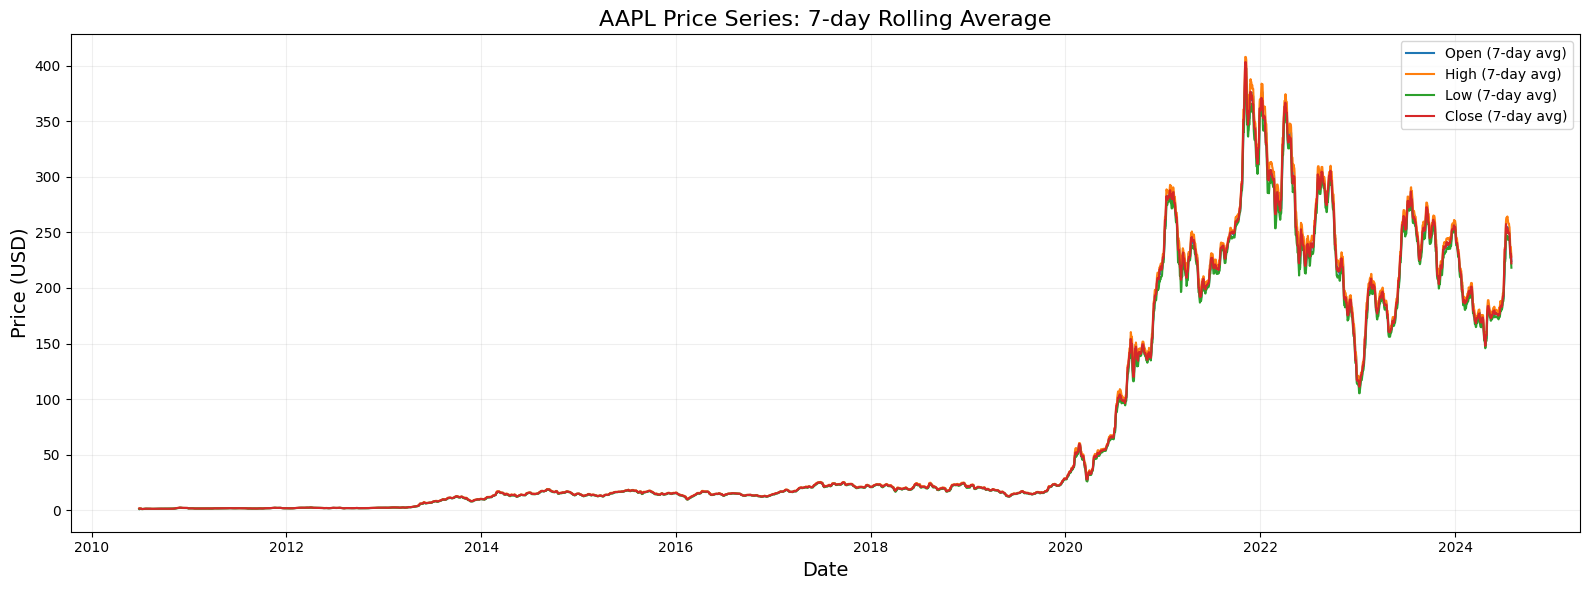

In [11]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_tsla, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("AAPL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


In [12]:
import talib

df_tsla['SMA_20'] = talib.SMA(df_tsla['Close'], timeperiod=20)
df_tsla['EMA_20'] = talib.EMA(df_tsla['Close'], timeperiod=20)


In [13]:
df_tsla['RSI_14'] = talib.RSI(df_tsla['Close'], timeperiod=14)


In [14]:
df_tsla['MACD'], df_tsla['MACD_signal'], df_tsla['MACD_hist'] = talib.MACD(
    df_tsla['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)


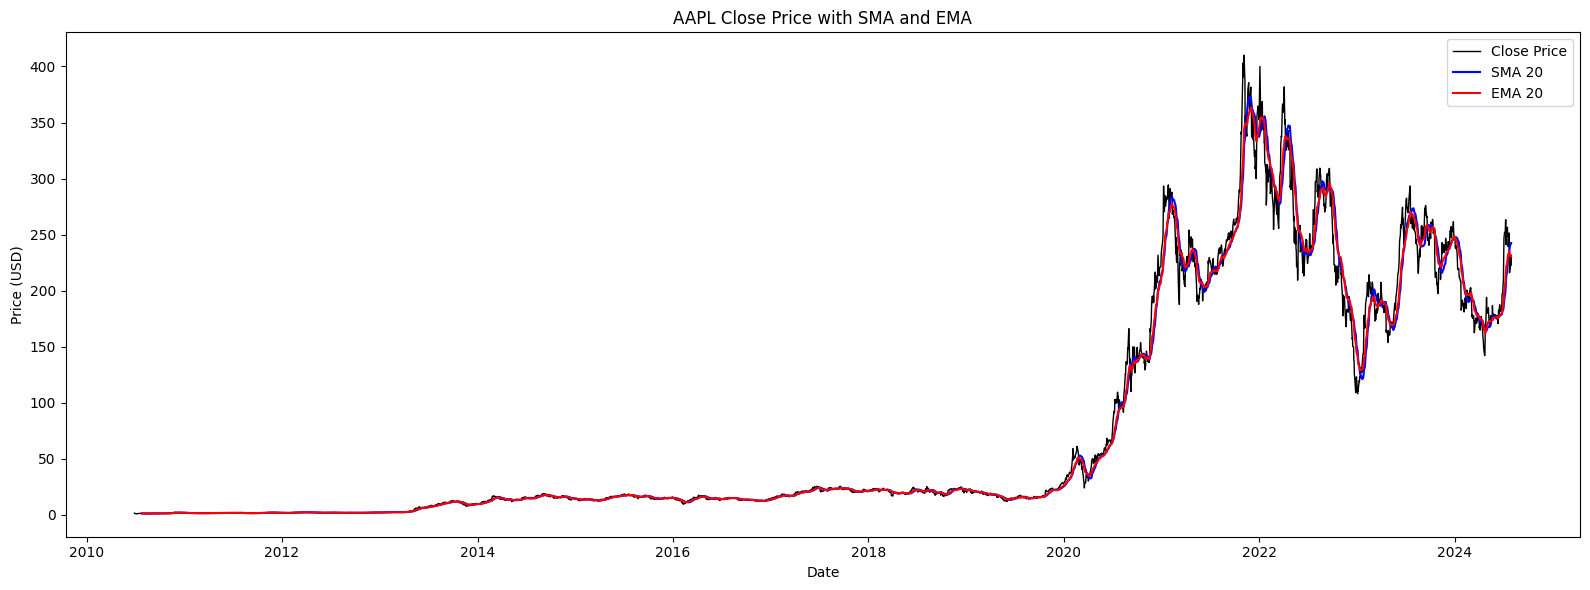

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(df_tsla['Date'], df_tsla['Close'], label='Close Price', color='black', linewidth=1)
plt.plot(df_tsla['Date'], df_tsla['SMA_20'], label='SMA 20', color='blue')
plt.plot(df_tsla['Date'], df_tsla['EMA_20'], label='EMA 20', color='red')
plt.title('AAPL Close Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()


## Interpreting Technical Indicators with TA-Lib: SMA, EMA, and Price Trend

The graph above overlays three key lines for AAPL stock:
- **Close Price** (black): The actual market closing price of AAPL for each trading day.
- **SMA 20** (blue): The 20-day Simple Moving Average, which calculates the unweighted average of the previous 20 closing prices for each point in time.
- **EMA 20** (red): The 20-day Exponential Moving Average, which is similar to the SMA but gives more weight to recent prices, making it more responsive to new market information.

**TA-Lib** is a widely-used library for financial technical analysis. It computes indicators like SMA and EMA, which traders and analysts use to understand price trends, identify potential buy or sell signals, and smooth out short-term volatility in market data.

### Key Insights from the Plot:
- **Trend Analysis**: Both the SMA and EMA lines smooth out short-term fluctuations in the price, making longer-term trends more visible. When the Close Price is above both moving averages, it typically signals an uptrend; when it is below, it may indicate a downtrend.
- **EMA vs SMA**: The EMA responds more quickly to recent price changes, so it can highlight trend reversals earlier than the SMA. Notice how the red EMA line turns or reacts more sharply than the blue SMA line.
- **Support and Resistance**: The moving averages can act as dynamic support or resistance levels, where the price may bounce or reverse.
- **Crossover Signals**: If the Close Price crosses above or below the moving averages, or if the EMA crosses the SMA, traders sometimes interpret these as potential buy or sell signals.

**In summary:** This visualization, powered by TA-Lib’s moving average calculations, allows you to detect overall trend direction, identify potential turning points, and gain a clearer view of price momentum for informed decision-making.


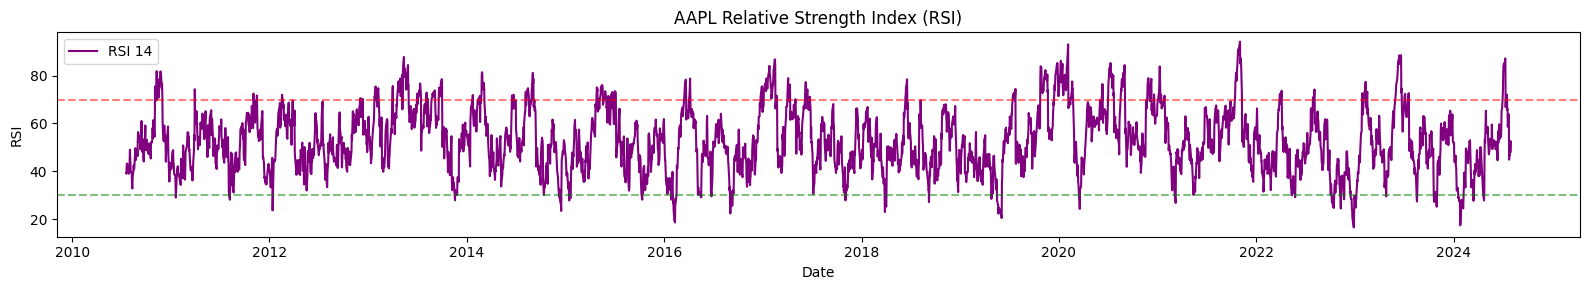

In [16]:
plt.figure(figsize=(16, 3))
plt.plot(df_tsla['Date'], df_tsla['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('AAPL Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()


## Interpreting the Relative Strength Index (RSI) with TA-Lib

The graph above visualizes the **14-day Relative Strength Index (RSI)** for AAPL, a momentum oscillator computed by TA-Lib. RSI is a popular indicator used by traders to measure the speed and magnitude of recent price changes.

- **RSI 14 (purple line):** This shows the relative strength over a 14-day period, ranging from 0 to 100.
- **Overbought threshold (red dashed line at 70):** When the RSI is above 70, it signals that the stock may be overbought or overvalued, and a price correction or pullback could be imminent.
- **Oversold threshold (green dashed line at 30):** When the RSI is below 30, it suggests that the stock may be oversold or undervalued, indicating a possible rebound or buying opportunity.

### Key Insights from the RSI Plot:
- **Momentum Shifts:** Rapid rises in RSI indicate strong upward price momentum, while rapid drops point to bearish momentum.
- **Reversal Signals:** Persistent readings above 70 or below 30 can warn of potential market reversals or trend slowdowns.
- **Confirming Trends:** RSI is often used in combination with moving averages or price patterns to confirm the strength of trends or the likelihood of reversals.

**In summary:** The RSI graph helps identify periods where AAPL may be overbought or oversold, giving early warnings of potential price reversals, and is a valuable tool for timing entry and exit points in trading strategies.


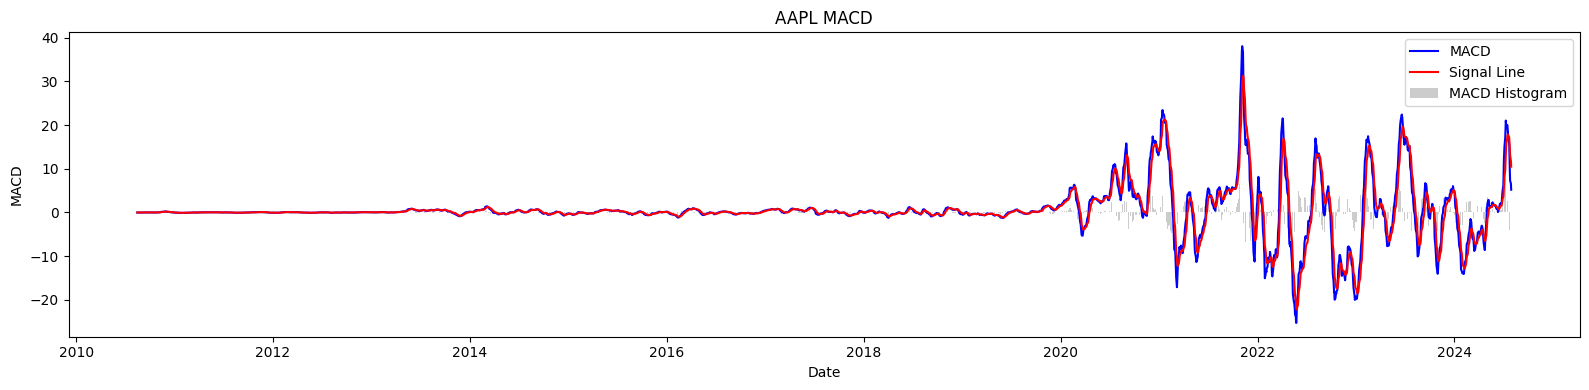

In [17]:
plt.figure(figsize=(16, 4))
plt.plot(df_tsla['Date'], df_tsla['MACD'], label='MACD', color='blue')
plt.plot(df_tsla['Date'], df_tsla['MACD_signal'], label='Signal Line', color='red')
plt.bar(df_tsla['Date'], df_tsla['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.4)
plt.title('AAPL MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.tight_layout()
plt.show()


## Interpreting the MACD Indicator with TA-Lib

The graph above illustrates the **Moving Average Convergence Divergence (MACD)** indicator for AAPL, along with its signal line and histogram, all calculated using TA-Lib. MACD is a powerful tool for detecting trend direction, momentum, and potential buy/sell signals.

- **MACD (blue line):** This is the difference between the 12-period and 26-period exponential moving averages (EMAs) of the closing price. It represents the short-term momentum versus the longer-term trend.
- **Signal Line (red line):** This is a 9-period EMA of the MACD itself. It serves as a trigger for buy or sell signals.
- **MACD Histogram (gray bars):** This shows the difference between the MACD and its signal line. Positive bars (above zero) suggest bullish momentum; negative bars (below zero) suggest bearish momentum.

### Key Insights from the MACD Plot:
- **Crossovers:** When the MACD line crosses above the signal line, it is typically seen as a bullish signal (potential buy). When the MACD crosses below the signal line, it is interpreted as a bearish signal (potential sell).
- **Histogram Interpretation:** The height and direction of the histogram bars indicate the strength of momentum. Rising positive bars mean increasing bullish momentum, while falling negative bars show increasing bearish momentum.
- **Trend Confirmation:** MACD can help confirm the strength and direction of a price trend. Sustained periods of positive MACD support uptrends, and sustained negative MACD support downtrends.

**In summary:** The MACD indicator, as visualized here, helps traders identify changes in momentum, potential entry and exit points, and the underlying trend strength for AAPL, making it a core component of technical trading strategies.
